# Assignment #9

Autoencoders are useful when it comes to dimensionality reduction tasks. These tools can be particularly useful for transferring image files. For instance, the encoder portion of the autoencoder can reduce image files to a lower dimensionality, dense coding representation, which facilitates file transfer and exchange. Then the decoder portion is able to recognize the dense image representation and reconstruct the image with minimal data loss. Using autoencoders within our corporation will improve our ability to share large rolls of image files across multiple sites that can facilitate customer complaint resolution, application engineering, and product development tasks particularly during Covid-19 stricken times where travel is limited. The ability to share image files across the globe will ensure our global team has the information needed to provide superior products and services to our customers. 

In order to evaluate the usefulness of autoencoders for our intended applications my team of Data Scientists tested two distinct autoencoders. One autoencoder was a stacked dense autoencoder consisting of an Input layer, three dense hidden layers, and an output layer. The second autoencoder was a convolutional autoencoder consisting of an input layer, six hidden convolutional layers, and an output layer.  The MNIST dataset was used to train and evaluate the autoencoders. The autoencoders were evaluated both quantitatively and qualitatively. Qualitatively, after the autoencoders were trained, arbitrary MNIST instances were fed through the autoencoders to create reconstructed images which were viewed alongside the original image to visually see the amount of data loss through the reconstruction process. Quantitatively, reconstructed images were fed to a digit classification neural network where 0-9 digit predictions were outputted. The predictions from the training data were compared to the true values and summarized in a confusion matrix. The predictions from the test data were compiled and submitted to Kaggle.com to determine the accuracy of the neural network in determining the appropriate image classification from the reconstructed images. The original training and test data were used as controls when analysing the confusion matrices and prediction accuracy outputs for each quantitative test.

In order to effectively execute these experiments, the MNIST data was first saved in a Google Drive directory for easy access while working in Colab. The data was then read into Pandas DataFrames and inspected to verify the shape and type of data. The MNIST data consists of 784 numerical features with values ranging from 0-255. Each feature represents a single pixel in a 28 x 28 image. Once the data was in the development environment, arbitrary images were viewed to get an initial understanding of the input data. The numeric data was then normalized by dividing each value by 255 to ensure each cell value was between 0-1. The training dataset provided was split into an official training dataset and validation dataset to ensure rigorous model development techniques were utilized. When needed, the data was resized to view images at various steps of the process and for use in convolutional layers. These steps ensured the data was sufficiently processed to train the autoencoders and classification model used within this study. 

The reconstructed images from both autoencoders were very encouraging. Twenty reconstructed images were viewed alongside the original input images and the similarities were striking. The reconstructed images did appear fuzzier, but all of the images were still recognizable and in some cases indistinguishable with the originals. The convolutional autoencoder produced images that on average appeared to have less data loss compared to the stacked autoencoder as indicated by crisper images. This observation was confirmed by the confusion matrices and Kaggle.com accuracy scores. When the reconstructed training images were fed to the classification model, the precision scores for each digit were between 94%-98% for the stacked autoencoder and 96%-99% for the convolutional autoencoder. The convolutional autoencoder reconstructions yielded a prediction accuracy of 95.5% when submitted to Kaggle.com. The stacked autoencoder reconstructions yielded a prediction accuracy of 94.8% when submitted to Kaggle.com. The original test images when fed through the same classifier yielded a prediction accuracy of 96.6%. These findings suggest that the reconstructed images have minimal data loss compared to the original images. Additionally, these results confirm the observation that the convolutional autoencoder outperforms the stacked autoencoder. In conclusion, autoencoders could be a valuable asset to our organization to facilitate image sharing. However, my team recommends evaluating the convolutional autoencoder on larger image files with higher resolution to verify their utility with images our company typically shares. 


## Import Libraries

In [1]:
!pip install scikit-plot

In [2]:
#Now load in all the libraries I will use:
%matplotlib inline
%load_ext tensorboard
import matplotlib.pyplot as plt  
import numpy as np               
import os
import pandas as pd  
import seaborn as sns 
import math
import re
from datetime import datetime
import matplotlib as mpl
import sklearn
from sklearn.model_selection import train_test_split
from scipy import stats
import scikitplot as skplt
import shutil
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
#Now load in tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import io

import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, GRU, SimpleRNN, LSTM
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint

from sklearn.model_selection import train_test_split

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Set Working Directory

In [5]:
#Set working directory
from google.colab import drive 
drive.mount('/content/drive')
os.getcwd()

Mounted at /content/drive


'/content'

In [6]:
#Show in My Drive /content working director:
!pwd

/content


In [7]:
#Move into working directory with MNIST data:
%cd /content/drive/MyDrive/'MSDS 422 - ML'/MNIST/
%ls

/content/drive/MyDrive/MSDS 422 - ML/MNIST
Convoluted_Reconstructed_Test.csv  train.csv        X_test_Reconstructed.csv
test.csv                           X_test_pred.csv


## EDA

In [8]:
#First need to load in data:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
#Look at the head for the training data:
train.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [10]:
#Look at the head for the test data:
test.head()

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]

In [11]:
#Look at the train info:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
#Look at the test info:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


As expected, we have to DataFrames here. Each with 784 columns consisting of the 784 pixels making up the 28 x 28 handwritten digits of the MNIST data set. Each Pixel contains a value between 0 (white) and 255 (black). The different shapes for these two DataFrames is due to the fact that the training data also contains image labels to support supervised learning.

In [14]:
#Verify shape of the DataFrames:
print("Training DataFrame Shape:", train.shape)
print("Test DataFrame Shape:", test.shape)

Training DataFrame Shape: (42000, 785)
Test DataFrame Shape: (28000, 784)


As we saw in Module #6, the Kaggle training data is 42,000 instances and the test data is 28,000 instances.

In [15]:
#Verify datatypes:
print("Training labels data type:", type(train['label'][0]))
print("Training Pixel data type:", type(train['pixel0'][0]))
print("Testing Pixel data type:", type(test['pixel0'][0]))

Training labels data type: <class 'numpy.int64'>
Training Pixel data type: <class 'numpy.int64'>
Testing Pixel data type: <class 'numpy.int64'>


Explicitly verifying what .info() told us about each the datatypes. All data are int64 type.

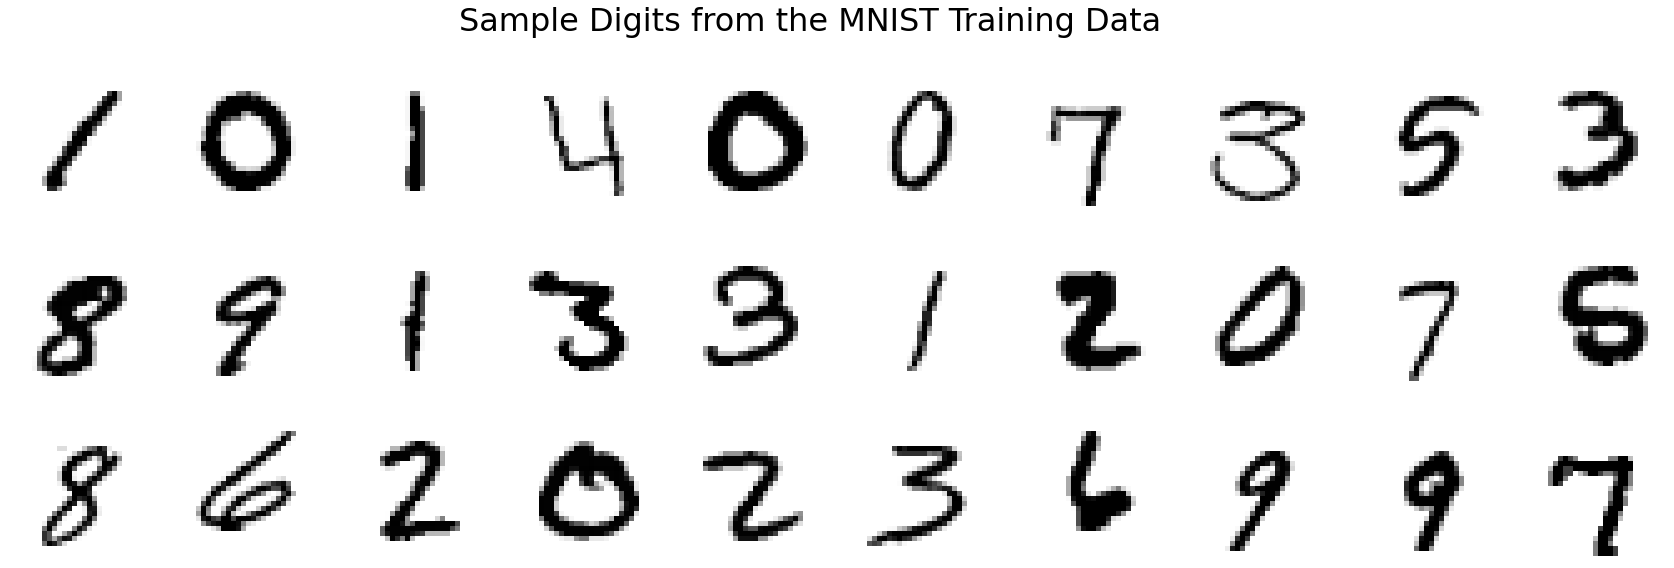

In [17]:
#Look at a variety of handwritten digits provided:
n_rows = 3
n_cols = 10
plt.figure(figsize = (n_cols*3, n_rows*3))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(np.resize(train.iloc[index][1:],(28,28)), cmap = 'binary', interpolation='nearest')
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace = 0.25)
plt.suptitle("Sample Digits from the MNIST Training Data", fontsize = 32)
plt.show()

The image above gives a sample representation of what the input data we are working with looks like. I find it helps when working with visual information to actually visualize the data along the process.

In [18]:
#Now split the training data into labels and the image data:
X = np.array(train.drop(labels = "label", axis = 1))
y = np.array(train['label'])
X_test = np.array(test)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_test shape:", X_test.shape)

X shape: (42000, 784)
y shape: (42000,)
X_test shape: (28000, 784)


In [19]:
#Now scale the training and test data:
X = X / 255.0
X_test = X_test / 255.0

Divide all data points by 255 as done in previous assignments. This normalizes the input today to ensure it only contains values 0-1. This will aid processing in the Autoencoder and Neural Network.

In [20]:
#Also need a validation set:
tf.random.set_seed(42)
seed = 42
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state = seed)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:",X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:",X_test.shape)

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (8400, 784)
y_val shape: (8400,)
X_test shape: (28000, 784)


## Build Dense Stacked AutoEncoder

First will build and train a Stacked Dense AutoEncoder:

In [22]:
#Build Stacked Dense AutoEncoder:

#Build Encoder:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(30, activation = "selu"),
])

#Build Decoder:
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = "selu", input_shape = [30]),
    keras.layers.Dense(28*28, activation = "sigmoid")
])

#Combine to build the Autoencoder:
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

#Compile and run the Autoencoder:
stacked_ae.compile(loss = "binary_crossentropy",
                   optimizer = keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(X_train, X_train, epochs = 20, 
                         validation_data = (X_val, X_val))

Epoch 1/20
1050/1050 [==============================] - 5s 2ms/step - loss: 0.2586 - val_loss: 0.1582
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1484 - val_loss: 0.1332
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1290 - val_loss: 0.1217
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1202 - val_loss: 0.1171
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1156 - val_loss: 0.1140
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1123 - val_loss: 0.1123
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1097 - val_loss: 0.1090
Epoch 8/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1077 - val_loss: 0.1062
Epoch 9/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1056 - val_loss: 0.1049
Epoch 10/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.104

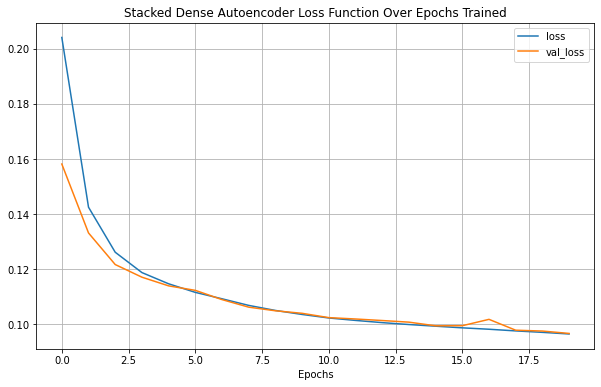

In [23]:
#Look at the loss change over time:
pd.DataFrame(history.history).plot(figsize = (10,6))
plt.xlabel("Epochs")
plt.grid(True)
plt.title("Stacked Dense Autoencoder Loss Function Over Epochs Trained")
plt.show()

The above image shows that the Autoencoder is clearly training its bias and weight parameters and managing to decrease the loss function over time.

In [29]:
#Look at the Autoencoder architecture:
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print("Stacked Encoder Architecture:\n")
print(stacked_encoder.summary())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print("Stacked Decoder Architecture:\n")
print(stacked_decoder.summary())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print("Stacked Dense Autoencoder Architecture:\n")
print(stacked_ae.summary())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Stacked Encoder Architecture:

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Stacked Decoder Architecture:

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (De

The above output displays the Architecture of the Stacked Dense Autoencoder created.

Now look at a few images from the validation set to compare images before and after going through the Autoencoder.

### Visualize Performance

In [30]:
#First define utility plotting functions:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, images=X_val, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(np.resize(images[image_index],(28,28)))
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(np.resize(reconstructions[image_index], (28,28)))

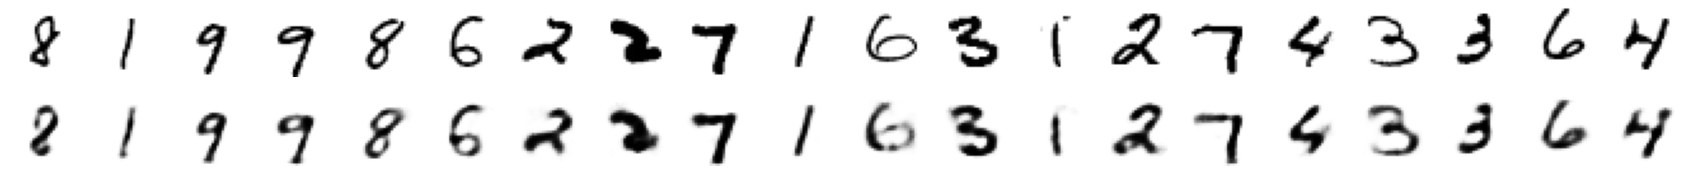

In [31]:
#Now look at some of the reconstructions compared to the inputs:
show_reconstructions(stacked_ae, n_images= 20)

The Autoencoder appears to perform very well from these images. All of the reconstructed images are still legible and look nearly identical to their inputs. All have a bit more noise, but some are nearly indistinguishable!

Next, I want to further visualize what my Autoencoder has learned:

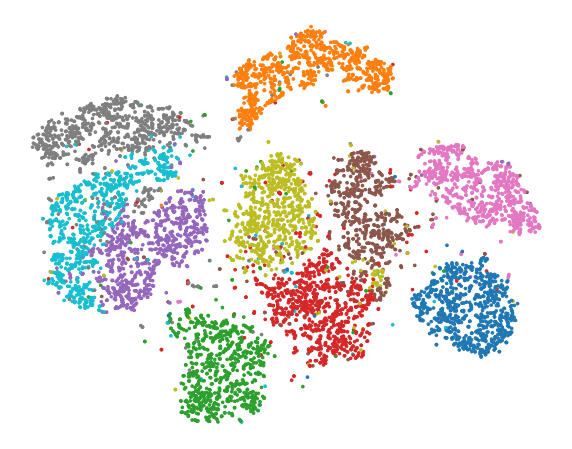

In [32]:
#First import TSNE
#Now run TSNE on the validation data and plot the 2D data:
from sklearn.manifold import TSNE
X_val_compressed = stacked_encoder.predict(X_val)
tsne = TSNE()
X_val_2D = tsne.fit_transform(X_val_compressed)
X_val_2D = (X_val_2D - X_val_2D.min()) / (X_val_2D.max() - X_val_2D.min())
plt.figure(figsize = (10,8))
plt.scatter(X_val_2D[:,0], X_val_2D[:,1], c=y_val, s=7, cmap = "tab10")
plt.axis("off")
plt.show()

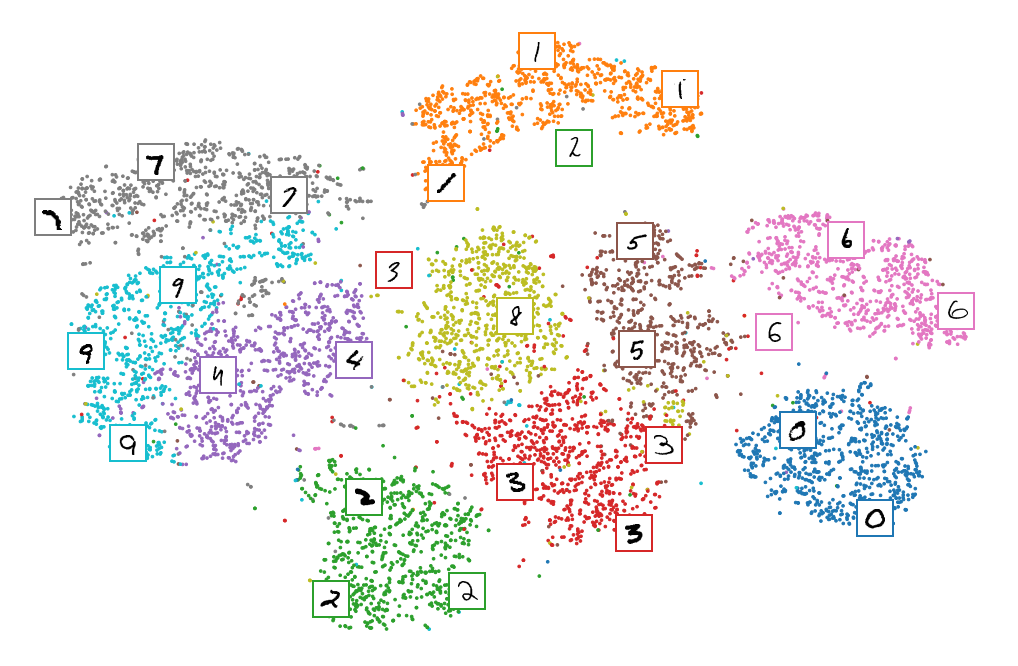

In [33]:
#Now beautify this map above and relate color groups to representative digit images:
plt.figure(figsize = (18,12))
cmap = plt.cm.tab10
plt.scatter(X_val_2D[:,0], X_val_2D[:,1], c=y_val, s = 7, cmap = cmap)
image_positions = np.array([[1.,1.]])
for index, position in enumerate(X_val_2D):
  dist = np.sum((position - image_positions) ** 2, axis = 1)
  if np.min(dist) > 0.02: # if far enough from other images
    image_positions = np.r_[image_positions, [position]]
    imagebox = mpl.offsetbox.AnnotationBbox(
        mpl.offsetbox.OffsetImage(np.resize(X_val[index],(28,28)), cmap = "binary"),
        position, bboxprops={"edgecolor": cmap(y_val[index]), "lw":2})
    plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

The above image shows the result of using the Encoder to reduce the dimensionality of the MNIST validation data down to 30D. Then Scikit-Learn's t-SNE algorithm further reduced the data dimensionality down to 2D so data clusters could be observed to reflect what the encoder learned.

This Color Coded data cluster map is a wealth of information about how the encoder relates various pieces of infromation. For instance, 3s, 5s, and 8s are all clustered together whereas 7s and 0s are very far apart. This gives an easy visual indication about how these digits relate. This is useful in understanding how the encoder is reducing dimensionality and what the key patterns of the digits it is learning. For instance, the encoder seems to be able to distinguish edges, arcs, and loops with stems.

## Create Dense Neural Network for Image Classification

Use top performing model from Module 6.
- Layers = 5
- Neurons = 100
- Optimizer = SGD
- Learning Rate = 0.1
- Epochs = 30

Steps to take here:
- Train Dense Neural Network Classifier on Training Data
- Use Stacked Dense Autoencoder to reconstruct X_train data
- Use Neural Network Classifier to make predictions on reconstructed images
- Look at Confusion Matrix for these predictions
- Use Stacked Dense Autoencoder to reconstruct X_test data
- Use Neural Network Classifier to make predictions on reconstructed images
- Submit predictions to Kaggle and compare to performance found in Module 6

In [34]:
#Build Model:
model = keras.models.Sequential([
    keras.layers.Flatten(),                            
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

#Compile Model:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1050/1050 [==============================] - 3s 2ms/step - loss: 1.8148 - accuracy: 0.4142 - val_loss: 0.4164 - val_accuracy: 0.8806
Epoch 2/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3706 - accuracy: 0.8895 - val_loss: 0.2931 - val_accuracy: 0.9129
Epoch 3/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2793 - accuracy: 0.9146 - val_loss: 0.2319 - val_accuracy: 0.9339
Epoch 4/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2130 - accuracy: 0.9365 - val_loss: 0.2081 - val_accuracy: 0.9382
Epoch 5/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1740 - accuracy: 0.9490 - val_loss: 0.1919 - val_accuracy: 0.9423
Epoch 6/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1552 - accuracy: 0.9535 - val_loss: 0.1716 - val_accuracy: 0.9480
Epoch 7/30
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1326 - accuracy: 0.9602 - val_loss: 0.1585 - val_accuracy:

Now we have a classification neural network built which can be used to make predictions about what image is represented in a handwritten input. 

In [35]:
#View model architecture for the Dense Neural Network:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

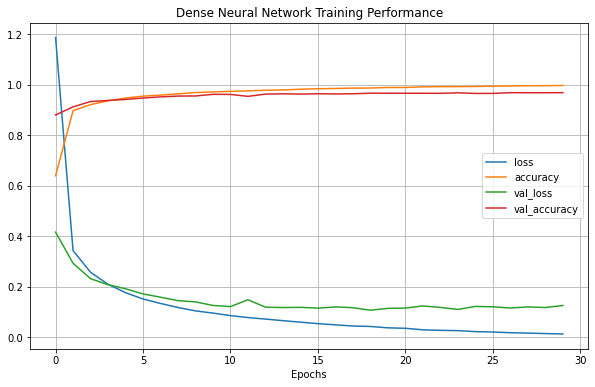

In [36]:
#Visualize model training peformance:
pd.DataFrame(history.history).plot(figsize = (10,6))
plt.xlabel("Epochs")
plt.grid(True)
plt.title("Dense Neural Network Training Performance")
plt.show()

This model had performance singificantly improve within the first 5 epochs. After that, the validation metrics leveled off with out much marginal gain after each epoch.

In [37]:
#Reconstruct X_train data
X_train_recon = stacked_ae.predict(X_train)

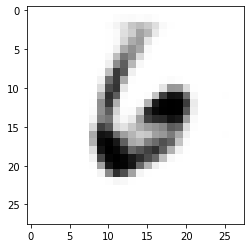

In [38]:
#Just verify the image looks a little noisy to prove reconstruction occurred:
plt.imshow(np.resize(X_train_recon[0], (28,28)), cmap = 'binary')
plt.show()

This example clearly looks like the image was reconstructed. So far so good.

In [39]:
#Make predictions on reconstructed data:
y_recon_pred = model.predict_classes(X_train_recon)
y_pred = model.predict_classes(X_train)

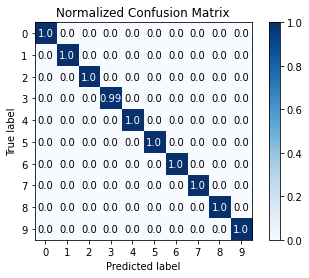

In [40]:
#Look at confusion matrix for predictions on reconstructed vs input images:

#Start with X_train predictions:
skplt.metrics.plot_confusion_matrix(y_pred, y_train, normalize = True)
plt.show()

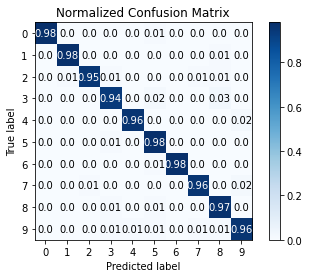

In [41]:
#Now look at confusion matrix for reconstructed images:
skplt.metrics.plot_confusion_matrix(y_recon_pred, y_train, normalize= True)
plt.show()

What we can learn from using the training data and reconstructions from the training data is that there is clearly performance reduction when using the reconstructed images. However, even with the reconstructed images, the model still performs strongly. With reconstructed images, the precision for each digit is between 94%-98%. That is still strong prediction ability!

In [42]:
#Now reconstruct the X_test data:
X_test_recon = stacked_ae.predict(X_test)

In [43]:
#Now make predictions on the X_test data and reconstructed X_test data with the DNN model:
test_recon_pred = model.predict_classes(X_test_recon)
test_pred = model.predict_classes(X_test)

In [44]:
#Confirm working directory:
!pwd

/content/drive/My Drive/MSDS 422 - ML/MNIST


In [45]:
#Output to .csv files for Kaggle Submission:
recon_eval = pd.DataFrame({"ImageId":list(range(1,28001)), "Label": test_recon_pred})
recon_eval.to_csv("X_test_Reconstructed.csv", index = False)
test_eval = pd.DataFrame({"ImageId":list(range(1,28001)), "Label": test_pred})
test_eval.to_csv("X_test_pred.csv", index = False)

#### Kaggle.com Score for Test Predictions: 0.96592 Submitted on 3/9/2021 @ 10:01 PM CST

#### Kaggle.com Score for Recononsructed Predictions: 0.94835 Submitted on 3/9/2021 @ 10:03 PM CST

Like we saw with the Confusion Matrices, there was a performance drop off. However, the performance drop off was not hugely significant. With the test data submitted to Kaggle, the accuracy drop off was only 2%. This allows us to conclude that reconstructed images from the Autoencoder can still be useful for neural network applications. Expanding more generally, this proves that Autocoders are effective at preserving the vast majority of useful information from the input data.

## Build Convolutional Autoencoder

Next, I want to see if a different type of Autoencoder can produce better, or different results. Since we are dealing with images, I figured a Convolutional Autoencoder is a logical next step.

In [46]:
#First, reshape the Data to work with Convolutional layers:
X_train = np.resize(X_train, (len(X_train), 28, 28))
X_val = np.resize(X_val, (len(X_val), 28, 28))
X_test = np.resize(X_test, (len(X_test), 28, 28))

print("X_train new shape:", X_train.shape)
print("X_val new shape:", X_val.shape)
print("X_test new shape:", X_test.shape)

X_train new shape: (33600, 28, 28)
X_val new shape: (8400, 28, 28)
X_test new shape: (28000, 28, 28)


In [47]:
#Build the Encoder:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1], input_shape = [28,28]), #Must be gray scale tensor for convolutional encoder
    keras.layers.Conv2D(16, kernel_size=3, padding = "same", activation = "selu"),
    keras.layers.MaxPool2D(pool_size = 2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation = "selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding = "same", activation="selu"),
    keras.layers.MaxPool2D(pool_size = 2)
])

#Build the Decoder:
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides = 2, padding = "valid",
                                 activation = "selu",
                                 input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides = 2, padding="same",
                                 activation = "selu"),
    keras.layers.Conv2DTranspose(1, kernel_size = 3, strides = 2, padding = "same",
                                activation = "sigmoid"),
    keras.layers.Reshape([28,28])   
])

#Combine into Autoencoder:
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [48]:
#Compile the Convolutional Autoencoder:
conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=0.1),
                metrics = ['accuracy'])

In [49]:
#Fit the Autoencoder
history = conv_ae.fit(X_train, X_train, epochs = 10, 
                         validation_data = (X_val, X_val))

Epoch 1/10
1050/1050 [==============================] - 34s 4ms/step - loss: 0.3291 - accuracy: 0.2152 - val_loss: 0.1406 - val_accuracy: 0.3682
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1302 - accuracy: 0.3906 - val_loss: 0.1123 - val_accuracy: 0.4310
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1100 - accuracy: 0.4382 - val_loss: 0.1035 - val_accuracy: 0.4421
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1016 - accuracy: 0.4481 - val_loss: 0.0973 - val_accuracy: 0.4527
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0966 - accuracy: 0.4588 - val_loss: 0.0940 - val_accuracy: 0.4610
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0933 - accuracy: 0.4682 - val_loss: 0.0912 - val_accuracy: 0.4705
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0906 - accuracy: 0.4758 - val_loss: 0.0894 - val_accuracy

It looks like the Convolutional Autoencoder was able to improve performance with each training Epoch. However, the accuracy metrics appear lower than expected.

In [50]:
#Look at the Autoencoder architecture:
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print("Convolutional Encoder Architecture:\n")
print(conv_encoder.summary())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print("Convolutional Decoder Architecture:\n")
print(conv_decoder.summary())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print("Convolutional Autoencoder Architecture:\n")
print(conv_ae.summary())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Convolutional Encoder Architecture:

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________

The above shows the Convolutional Autoencoder Architecture.

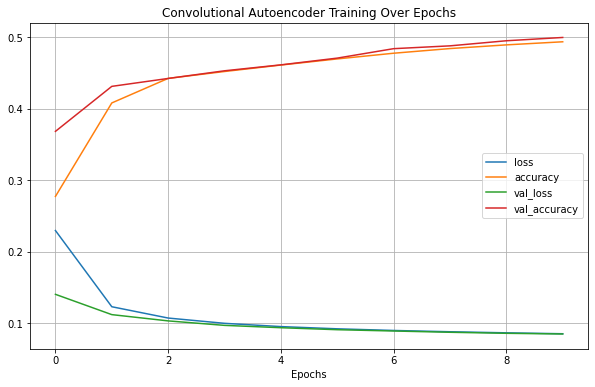

In [51]:
#Look at AutoEncoder Training Progress time:
pd.DataFrame(history.history).plot(figsize = (10,6))
plt.xlabel("Epochs")
plt.grid(True)
plt.title("Convolutional Autoencoder Training Over Epochs")
plt.show()

The graph above shows consistent training performance with the Convolutional Autoencoder.

### Visualize Performance

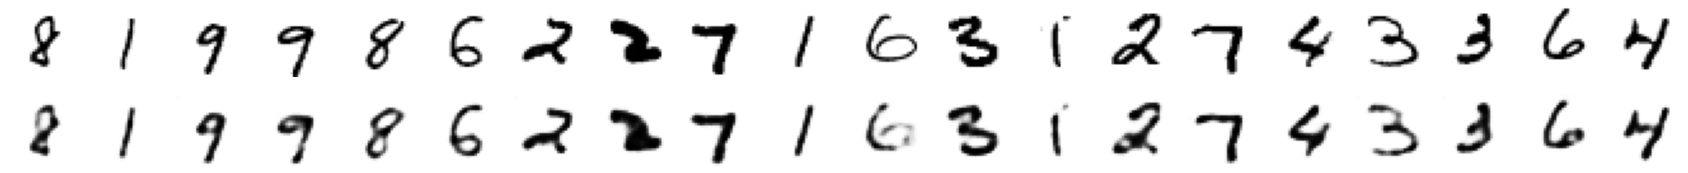

In [52]:
#Now look at some of the reconstructions compared to the inputs:
show_reconstructions(conv_ae, n_images= 20)

The Convolutional AutoEncoder appears to be outperforming the Dense Stacked AutoEncoder from visual inspection of the same predicted X_val instances. This is a qualitative claim and unexpected given the Convolutional Autoencoders accuracy metrics while training.

## Run Convolutional AutoEncoder Reconstructions through DNN

In [53]:
#Reconstruct X_train data
X_train_recon = conv_ae.predict(X_train)
X_train_recon = np.resize(X_train_recon, (len(X_train_recon),28*28))

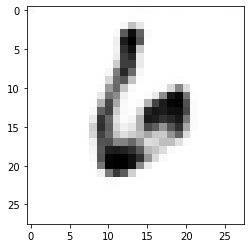

In [54]:
#Just verify the image looks a little noisy to prove reconstruction occurred:
plt.imshow(np.resize(X_train_recon[0], (28,28)), cmap = 'binary')
plt.show()

In [55]:
#Make predictions on reconstructed data:
y_recon_pred = model.predict_classes(X_train_recon)
y_pred = model.predict_classes(X_train)

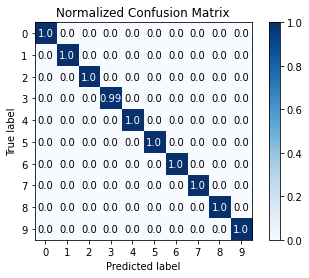

In [56]:
#Look at confusion matrix for predictions on reconstructed vs input images:

#Start with X_train predictions:
skplt.metrics.plot_confusion_matrix(y_pred, y_train, normalize = True)
plt.show()

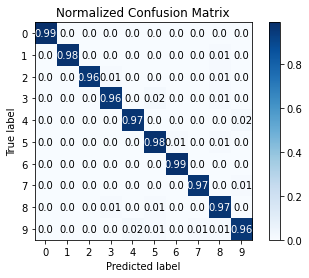

In [57]:
#Now look at confusion matrix for reconstructed images:
skplt.metrics.plot_confusion_matrix(y_recon_pred, y_train, normalize= True)
plt.show()

The confusion matrix above gives quantifiable evidence to the statement that the Convolutional AutoEncoder appears to outperform the Stacked Dense AutoEncoder. The Confusion Matrix comparing the true training labels to the reconstructed predictions shows each digit had a precision greater than 96%.

In [58]:
#Now reconstruct the X_test data:
X_test_recon = conv_ae.predict(X_test)
X_test_recon = np.resize(X_test_recon, (len(X_test_recon), 28*28))

In [59]:
#Now make predictions on the X_test data and reconstructed X_test data with the DNN model:
test_recon_pred = model.predict_classes(X_test_recon)
test_pred = model.predict_classes(X_test)

In [60]:
!pwd

/content/drive/My Drive/MSDS 422 - ML/MNIST


In [61]:
#Output to .csv files for Kaggle Submission:
ae_conv_eval = pd.DataFrame({"ImageId":list(range(1,28001)), "Label": test_recon_pred})
ae_conv_eval.to_csv("Convoluted_Reconstructed_Test.csv", index = False)
#test_eval = pd.DataFrame({"ImageId":list(range(1,28001)), "Label": test_pred})
#test_eval.to_csv("X_test_pred.csv", index = False)

#The X_test samples were already tested above ^^^

#### Kaggle.com Score: 0.95539 UserID: MikeSoukup Submitted on 3/10/2021 @ 9:47PM CST

There we have it, further quantitative evidence to support the qualitative statement above that it appears the Convolutional AutoEncoder does a superior job at finding patterns and reconstructing the compressed MNIST images compared to the Stacked Dense AutoEncoder evaluated earlier. The Convolutional AutoEconder is still lagging the original images with regard to predictive ability, but it is only off by 1% point. This is quite impressive!